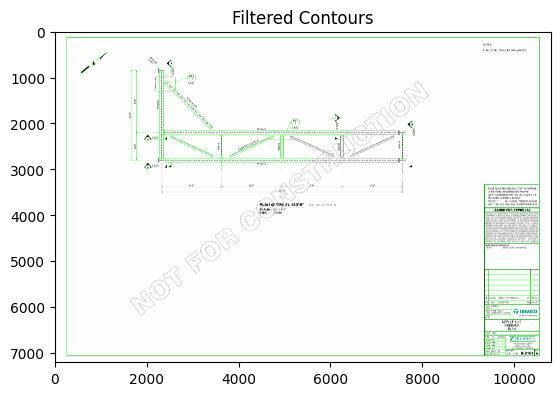

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'page_0.png'
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours by area to remove small contours
min_contour_area = 10000  # Adjust this value based on your image
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

# Draw filtered contours for visualization
image_contours = image.copy()
cv2.drawContours(image_contours, filtered_contours, -1, (0, 255, 0), 3)

# Display the image with contours
plt.imshow(cv2.cvtColor(image_contours, cv2.COLOR_BGR2RGB))
plt.title('Filtered Contours')
plt.show()

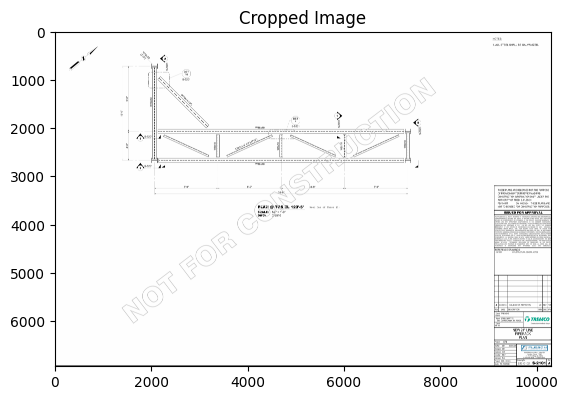

In [24]:
# Calculate bounding box of all filtered contours
x, y, w, h = cv2.boundingRect(np.vstack(filtered_contours))

# Crop the image to the bounding box
cropped_image = image[y:y+h, x:x+w]

# Save and display the cropped image
cropped_image_path = 'cropped_image.png'
cv2.imwrite(cropped_image_path, cropped_image)

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')
plt.show()

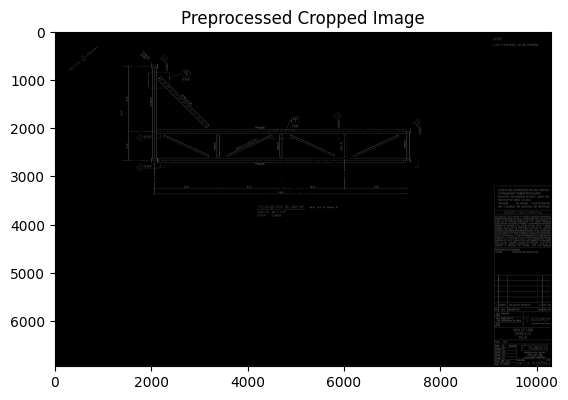

N@MESs
1. ALL STEEL SHALL BE GALVANIZED.
fo vo KO, L
< \A ONG? a
- 2, DET
f | 40
| /
l ( S-5201
| | IN i
(
S —|. — =
( N
( Nw
: | Dy
= = '%
fe) s<| | w
() NN iA
S ( we
=| | NS
. | N
2 \ J
: | \ @)
A
DET ~ L.
\ cl 4 S ~
! / / q (B}
/ $5201 wo
i W16x40 / =)
— = | ee
| BE S { re D
= ey
<n f —— O\ Ke a — Ss “| Ao
aa [ —— | ce A Sy ——Z£ 2) |
= —— o| | Sa SS4 | | RSQ o| | Ae S
=) | Sy Se ibs \ A e Sey Se A |
al Ss | '\ EP x<| | SS §| Il _ =
= [ SQ ioe) asgor AA — & Za (
| Say | A | ey l Ae (
— EEF — EEF
= | si a I] a
W16x40
(x S-5201
| 2)
Ne
| |
| |
8'-o” 8'-9Q” [ 8'-o” 8'-9Q”
THESE PLANS ARE RELEASED FOR THE PURPOSE
q 00
SSE OF PROVIDING INTERIM REVIEW AND PRE-
CONSTRUCTION INFORMATION ONLY, UNDER THE
AUTHORITY OF FRED. E. FLESCH
PE# 54017 ON 04/25/24 THESE PLANS ARE
P \ = d co ; B
[2A /a\ yu @ TOS ps/L “| DS} oS) Need One of These (1) NOT TO BE USED FOR CONSTRUCTION PURPOSES.
D fwd oe it ag
SwAles 12." s 1'-0 ISSUEDIEORFARPROVAL
(Na 3
(DWSe C 2510 NOT PUBLISHED, ALL RIGHTS RESERVED BY THE 

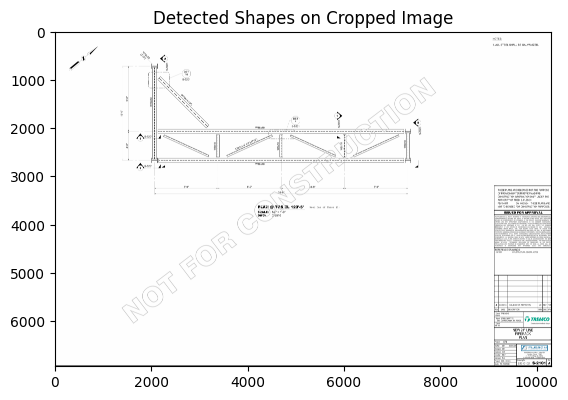

[{'type': 'Rectangle', 'position': (9102, 6869, 457, 61)}, {'type': 'Rectangle', 'position': (9102, 6869, 457, 61)}, {'type': 'Complex', 'position': (9191, 6908, 4, 5)}, {'type': 'Complex', 'position': (9191, 6908, 4, 5)}, {'type': 'Complex', 'position': (9131, 6906, 15, 8)}, {'type': 'Complex', 'position': (9149, 6902, 10, 9)}, {'type': 'Complex', 'position': (9149, 6902, 10, 9)}, {'type': 'Complex', 'position': (9147, 6898, 15, 16)}, {'type': 'Complex', 'position': (9191, 6892, 4, 5)}, {'type': 'Complex', 'position': (9191, 6892, 4, 5)}, {'type': 'Complex', 'position': (9171, 6891, 16, 23)}, {'type': 'Complex', 'position': (9171, 6891, 16, 23)}, {'type': 'Complex', 'position': (9175, 6894, 9, 7)}, {'type': 'Complex', 'position': (9175, 6894, 9, 7)}, {'type': 'Complex', 'position': (9147, 6891, 14, 16)}, {'type': 'Complex', 'position': (9130, 6891, 16, 20)}, {'type': 'Complex', 'position': (9390, 6884, 24, 28)}, {'type': 'Complex', 'position': (9390, 6884, 24, 28)}, {'type': 'Complex'

In [25]:
# Reapply preprocessing to the cropped image
gray_cropped = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
_, thresh_cropped = cv2.threshold(gray_cropped, 150, 255, cv2.THRESH_BINARY_INV)
edges_cropped = cv2.Canny(thresh_cropped, 50, 150)

# Display the preprocessed cropped image
plt.imshow(edges_cropped, cmap='gray')
plt.title('Preprocessed Cropped Image')
plt.show()

# Reapply text extraction
text_cropped = pytesseract.image_to_string(edges_cropped, config="--psm 6")
print(text_cropped)

# Reapply shape detection
detected_shapes_cropped = detect_shapes(cropped_image.copy(), edges_cropped)

# Display the detected shapes on the cropped image
detected_image_cropped = cv2.imread(cropped_image_path)
plt.imshow(cv2.cvtColor(detected_image_cropped, cv2.COLOR_BGR2RGB))
plt.title('Detected Shapes on Cropped Image')
plt.show()

print(detected_shapes_cropped)